Dataset Link : 'https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia'

In [ ]:
train_dir = '../input/chest-xray-pneumonia/chest_xray/train'
val_dir = '../input/chest-xray-pneumonia/chest_xray/val'
test_dir = '../input/chest-xray-pneumonia/chest_xray/test'

In [13]:
image_height = 128
image_width = 128
batch_size = 32

In [16]:
from tensorflow import keras
train_ds = keras.preprocessing.image_dataset_from_directory(
           train_dir,
           color_mode='grayscale',
           image_size=(image_height,image_width),
           batch_size=batch_size )

test_ds = keras.preprocessing.image_dataset_from_directory(
           test_dir,
           color_mode='grayscale',
           image_size=(image_height,image_width),
           batch_size=batch_size )

val_ds = keras.preprocessing.image_dataset_from_directory(
           val_dir,
           color_mode='grayscale',
           image_size=(image_height,image_width),
           batch_size=batch_size )

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


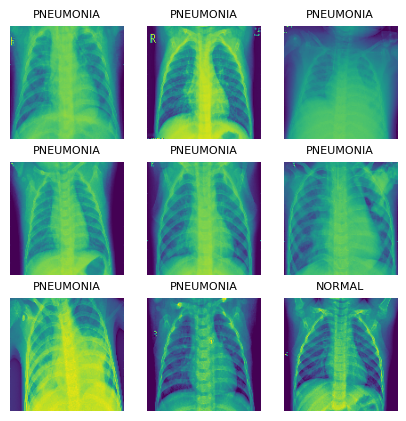

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        plt.title(train_ds.class_names[labels[i]],fontsize=8)
        plt.axis('off')

In [49]:
from tensorflow import keras
model = keras.Sequential([
        keras.layers.Rescaling(1./255),
        keras.layers.Conv2D(32,3,activation='relu'),
        keras.layers.MaxPool2D(),
        keras.layers.Conv2D(32,3,activation='relu'),
        keras.layers.MaxPool2D(),
        keras.layers.Conv2D(32,3,activation='relu'),
        keras.layers.MaxPool2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(128,activation='relu'),
        keras.layers.Dense(2,activation='softmax')
])
    

In [50]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [51]:
epochs = 10
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


163/163 ━━━━━━━━━━━━━━━━━━━━ 72s 422ms/step - accuracy: 0.8226 - loss: 0.4207 - val_accuracy: 0.6875 - val_loss: 0.6254
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 412ms/step - accuracy: 0.9608 - loss: 0.1077 - val_accuracy: 0.8125 - val_loss: 0.3715
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 407ms/step - accuracy: 0.9559 - loss: 0.1057 - val_accuracy: 0.6875 - val_loss: 0.6057
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 411ms/step - accuracy: 0.9708 - loss: 0.0805 - val_accuracy: 0.8750 - val_loss: 0.2888
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 68s 409ms/step - accuracy: 0.9768 - loss: 0.0582 - val_accuracy: 0.7500 - val_loss: 0.4153
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 414ms/step - accuracy: 0.9812 - loss: 0.0533 - val_accuracy: 0.8750 - val_loss: 0.2531
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 413ms/step - accuracy: 0.9856 - loss: 0.0442 - val_accuracy: 0.7500 - val_loss: 0.5996
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 411ms/step - accuracy: 0.9808 - loss: 0.0582 - val

In [52]:
model.evaluate(test_ds)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.7308 - loss: 2.3533


[2.3041348457336426, 0.7307692170143127]